In [13]:
# torch
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision import models

# imagenes
from PIL import Image

# local
from gradcam.base import GradCAM, BackPropagation, GuidedBackProp, Deconvnet

# utils
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 8
import numpy as np
import ast

In [2]:
file = open('./misc/imagenet1000_clsidx_to_labels.txt', "r")
contents = file.read()

# clases de ImageNet
classes = ast.literal_eval(contents)

all_transforms = image = transforms.Compose([   
    transforms.Resize((224, 224)), # las imagenes originales son de tamaño 512x512
    transforms.ToTensor(), # convertir a torch.Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalización
])

img_transforms = image = transforms.Compose([   
    transforms.Resize((224, 224)), # las imagenes originales son de tamaño 512x512
    transforms.ToTensor() # convertir a torch.Tensor
])


In [3]:
model = models.resnet101(pretrained=True)
model.eval();

In [4]:
img = Image.open('./misc/sample3.jpg')
x = all_transforms(img).view(1, 3, 224, 224)

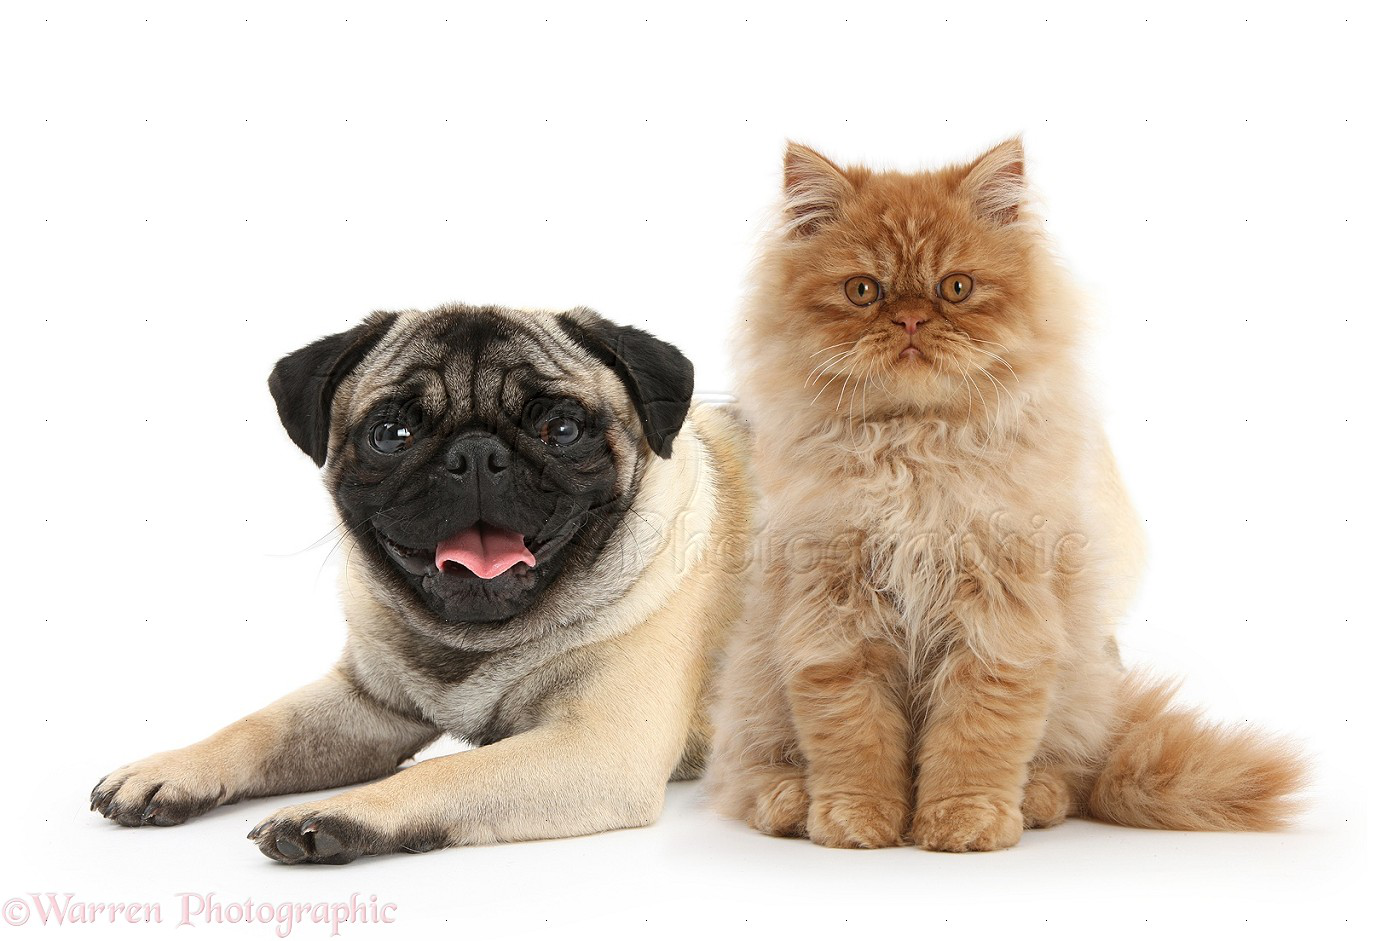

In [5]:
img

In [7]:
out = model(x)
_, preds = torch.topk(out,6)

print(f"Top {preds.size(1)} predicciones")

for i, c in enumerate(preds.squeeze()):
    print(f"{i+1}. {classes[c.item()]}")

Top 6 predicciones
1. Persian cat
2. pug, pug-dog
3. chow, chow chow
4. Pekinese, Pekingese, Peke
5. Brabancon griffon
6. tabby, tabby cat


In [8]:
bp = BackPropagation(model=model)
probs, ids = bp.forward(x) 
bp.remove_hook()

In [9]:
# Grad-CAM
gcam = GradCAM(model=model)
_ = gcam.forward(x)

gcam.backward(ids=ids[:,[0]])
regions = gcam.generate(target_layer='layer4')

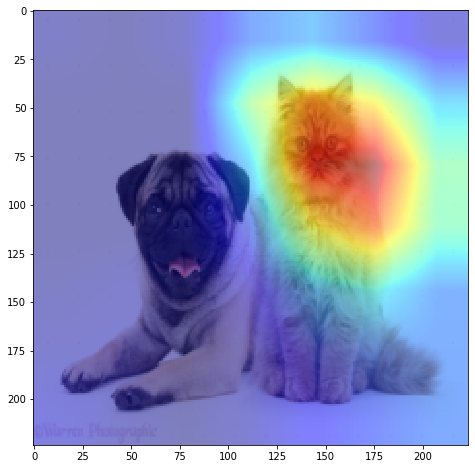

In [14]:
plt.imshow(img_transforms(img).permute(1, 2, 0))
plt.imshow(regions[0, 0, ...], cmap='jet', alpha=0.5)
plt.show()